In [95]:
# from lfs_tree import *
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
import pydot
import networkx as nx
from string import Template
import pandas as pd
import glob
import pydot
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import pickle
from IPython.display import Image, display

In [96]:
def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

def show_trees(directory):
    print(directory)
    treefiles = glob.glob(f'{directory}*tree_*')
    for i in range(0, len(treefiles)):
        for f in glob.glob(f'{directory}*tree_*_{i}*'):
            file = open(f)
            dot_string = file.read()
            print(f)
            graph = pydot.graph_from_dot_data(dot_string)[0]
            view_pydot(graph)
            print('\n')
def show_stats(directory):
    f = glob.glob(f'{directory}*experiment_stats')[0]
#     print(f)
#                                 experiment_stats
#     file = open('../intro_example/experiment_stats')
    df = pd.read_csv(f)
#     print(df)
    return df

def show_stats_combined(directory):
    fs = glob.glob(f'{directory}*/*experiment_stats')
    df = pd.concat([pd.read_csv(f) for f in fs])
#     print(df)
    return df

def show_user_inputs(directory):
    f = glob.glob(f'{directory}sampled*')[0]
    df = pd.read_csv(f)
    print(list(df))
    return df[['text', 'expected_label', 'model_pred', 'id', 'cid', 'vectors']].sort_values(by=['text'])

def show_after_results(directory):
    f = glob.glob(f'{directory}*after_fix_results*')[0]
    df = pd.read_csv(f)
    print(list(df))
    df = df.rename(columns={'model_pred':'new_model_pred', 'vectors':'new_vectors'})
    print(list(df))
    return df[['cid','new_model_pred', 'new_vectors']]


def view_repair_bookkeeping_results(directory):
    print(glob.glob(f'{directory}*book_keeping_dict*'))
    f = glob.glob(f'{directory}*book_keeping_dict*')[0]
#               20230921002723fix_book_keeping_dict.pkl
    with open(f, 'rb') as file:
        # Load the object from the file
        loaded_object = pickle.load(file)
#         print("Object loaded successfully:")
#         print(loaded_object)
    return loaded_object

## Architect spam, painter ham

In [97]:
show_stats('../experiment_results_folders/witan_refinements_3/_20231013160948/')

,strat,seed,table_name,rbbm_runtime,bbox_runtime,avg_tree_size_increase,user_input_size,complaint_ratio,num_complaints,num_confirmations,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt,num_functions,deletion_factor,post_fix_num_funcs,num_of_funcs_processed_by_algo,complaint_reached_max,confirm_reached_max,lf_source,retrain_after_percent,retrain_accuracy_thresh,load_funcs_from_pickle,pre_deletion_threshold
0,information_gain,999,painter_architect,2.022,22.196,3.2,40,0.5,20,20,0.931,0.55,1.0,0.913,10877,10877,10,0.0,10,10,False,False,undefined,1,1,False,0.0


../experiment_results_folders/witan_refinements_3/_20231013160948/
../experiment_results_folders/witan_refinements_3/_20231013160948/20231013160948_tree_information_gain_0_dot_file


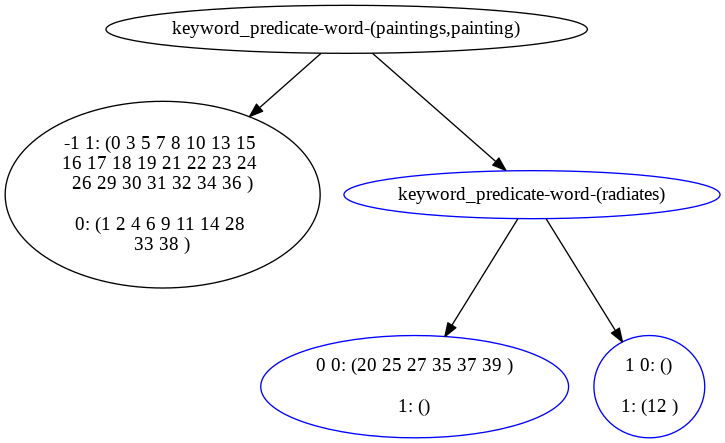



../experiment_results_folders/witan_refinements_3/_20231013160948/20231013160948_tree_information_gain_1_dot_file


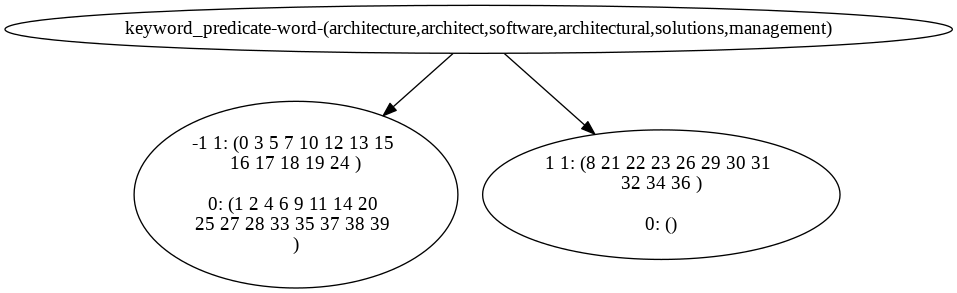



../experiment_results_folders/witan_refinements_3/_20231013160948/20231013160948_tree_information_gain_2_dot_file


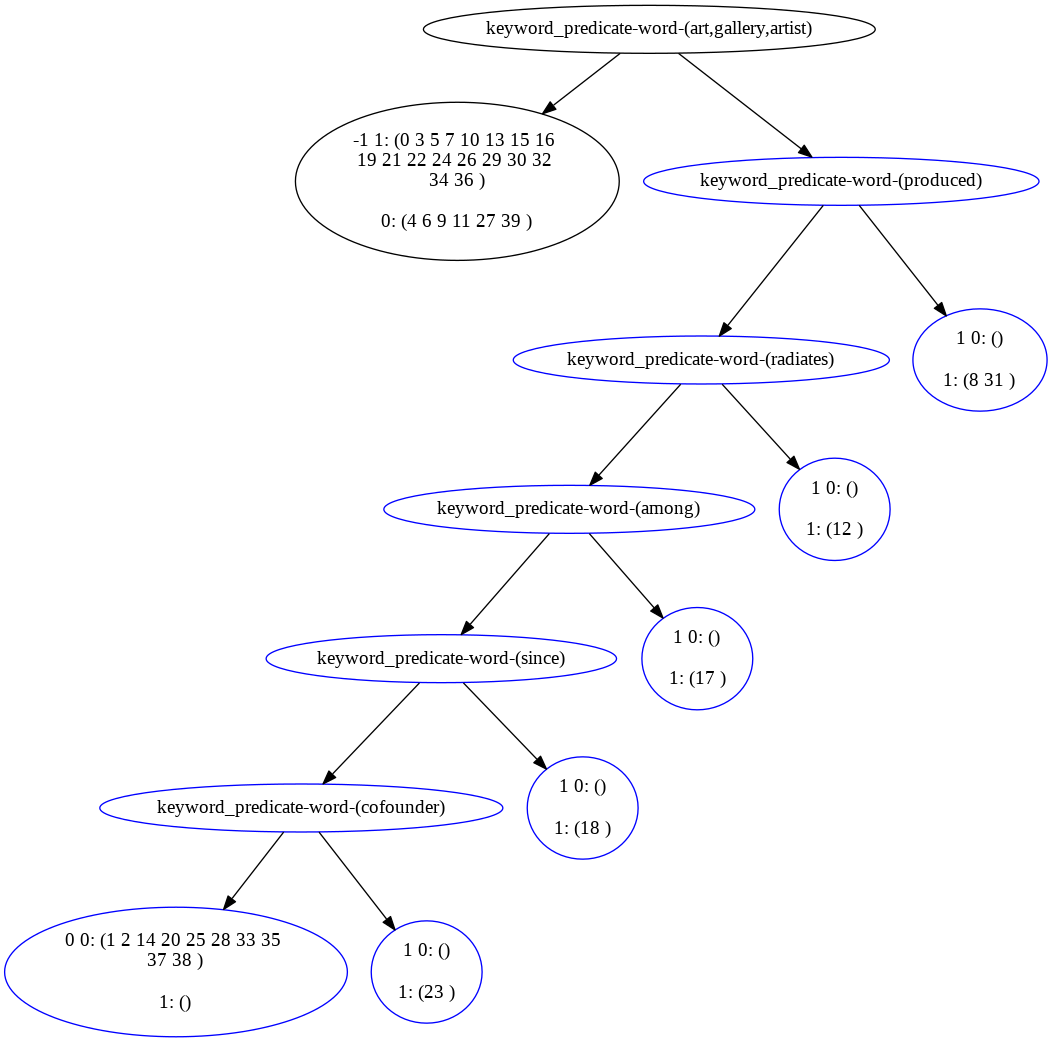



../experiment_results_folders/witan_refinements_3/_20231013160948/20231013160948_tree_information_gain_3_dot_file


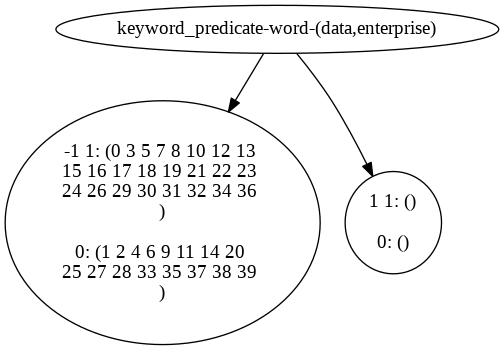



../experiment_results_folders/witan_refinements_3/_20231013160948/20231013160948_tree_information_gain_4_dot_file


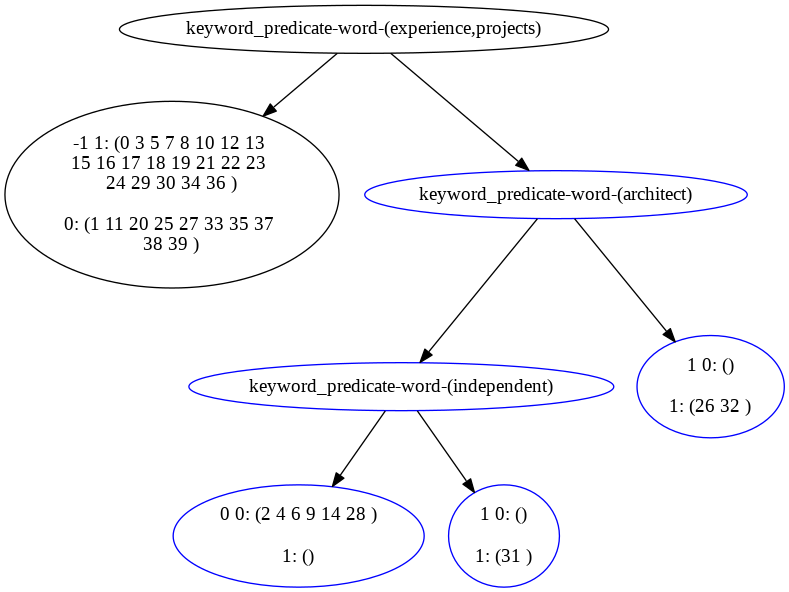



../experiment_results_folders/witan_refinements_3/_20231013160948/20231013160948_tree_information_gain_5_dot_file


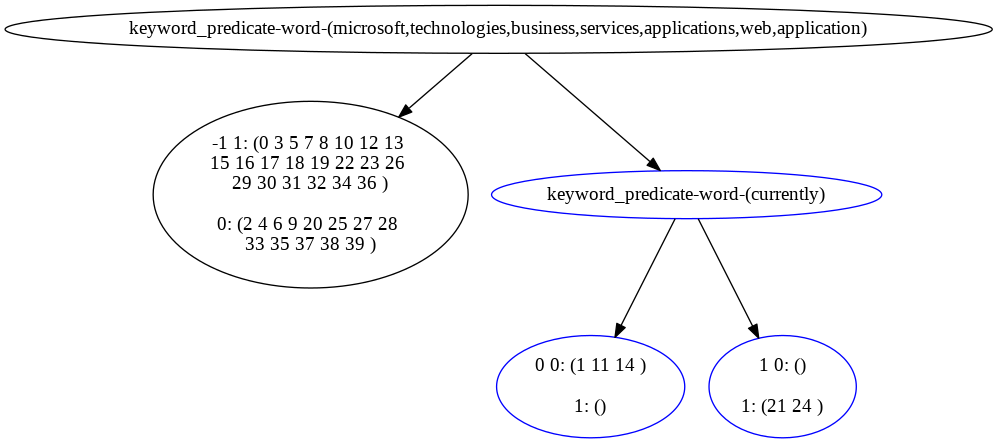



../experiment_results_folders/witan_refinements_3/_20231013160948/20231013160948_tree_information_gain_6_dot_file


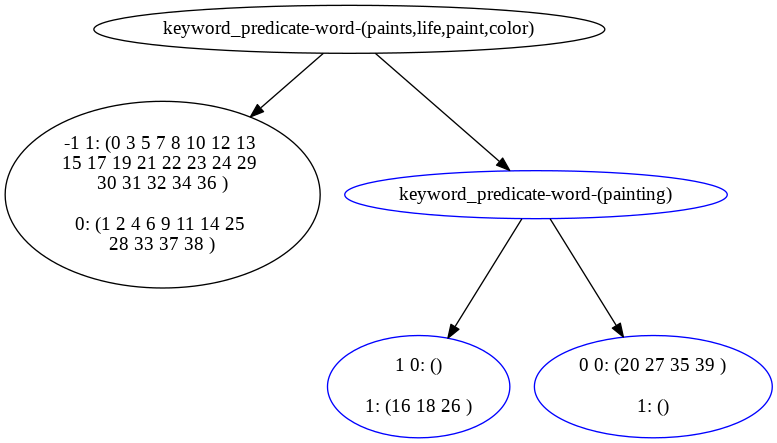



../experiment_results_folders/witan_refinements_3/_20231013160948/20231013160948_tree_information_gain_7_dot_file


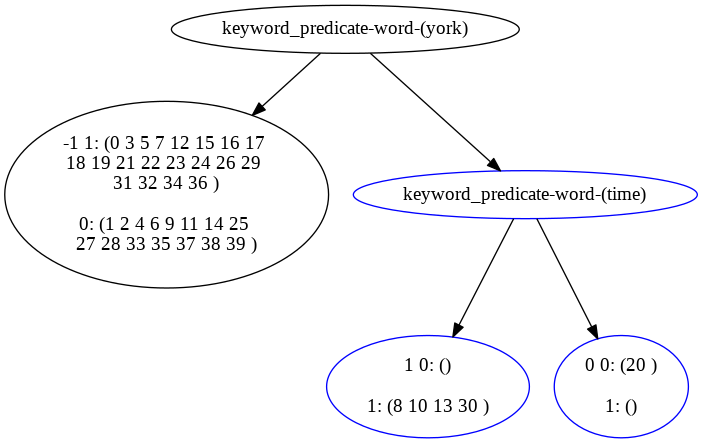



../experiment_results_folders/witan_refinements_3/_20231013160948/20231013160948_tree_information_gain_8_dot_file


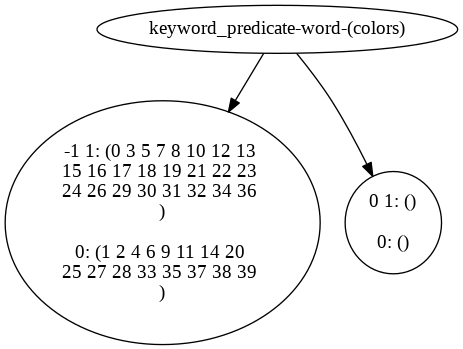



../experiment_results_folders/witan_refinements_3/_20231013160948/20231013160948_tree_information_gain_9_dot_file


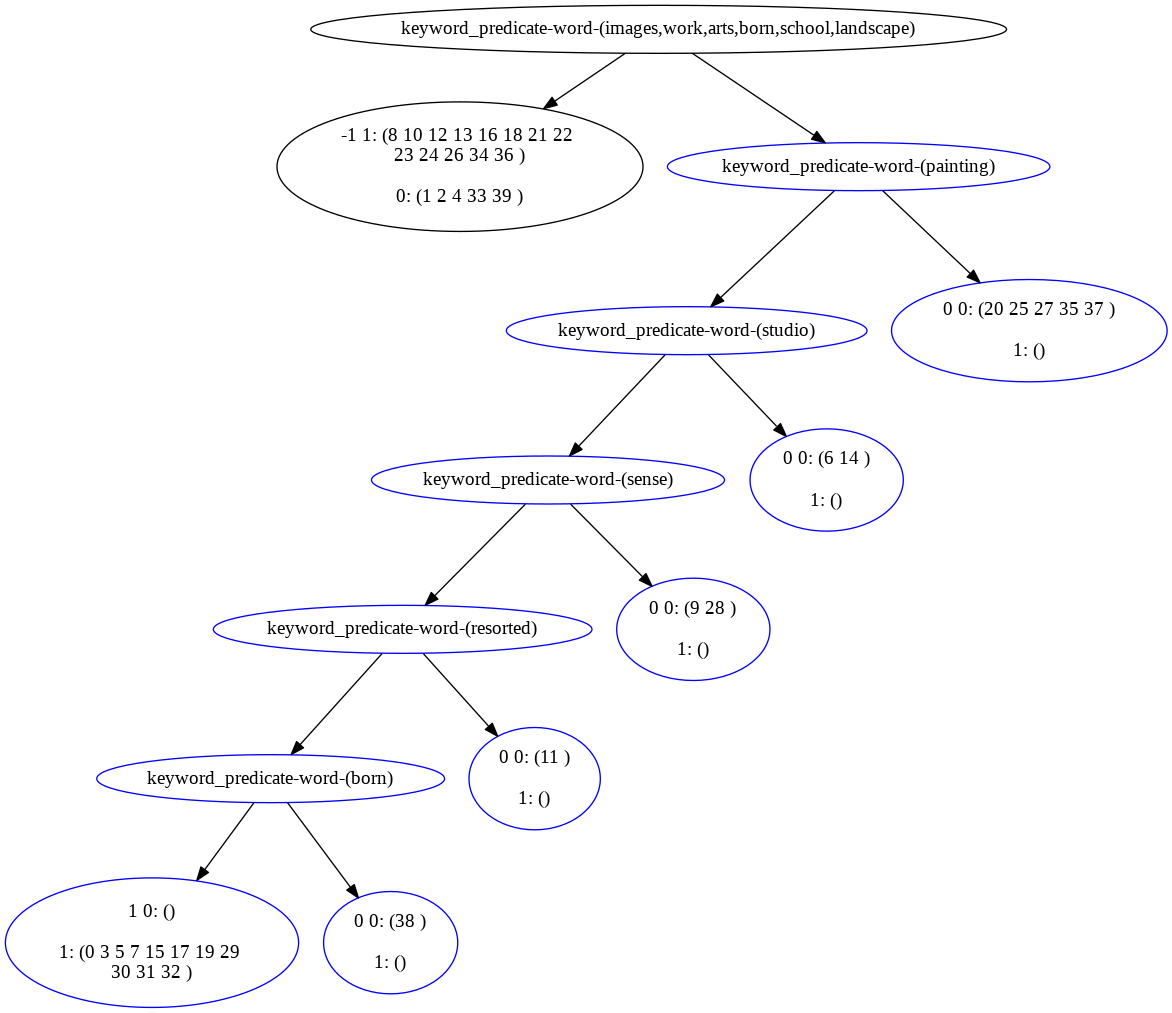

In [98]:
show_trees('../experiment_results_folders/witan_refinements_3/_20231013160948/')

In [99]:
architect_uinput = show_user_inputs('../experiment_results_folders/witan_refinements_3/_20231013160948/')

['old_text', 'expected_label', 'fold', 'cid', 'text', 'model_pred', 'vectors', 'id']


In [100]:
architect_results_after_fix = show_after_results('../experiment_results_folders/witan_refinements_3/_20231013160948/')

['old_text', 'expected_label', 'fold', 'cid', 'text', 'model_pred', 'vectors']
['old_text', 'expected_label', 'fold', 'cid', 'text', 'new_model_pred', 'new_vectors']


In [101]:
architect_results_after_fix.head()

,cid,new_model_pred,new_vectors
0,1,1,"-1,1,-1,-1,-1,-1,-1,-1,-1,-1"
1,2,1,"-1,-1,-1,-1,0,-1,-1,-1,-1,1"
2,3,1,"-1,1,-1,-1,-1,-1,-1,-1,-1,1"
3,4,1,"-1,1,-1,-1,0,0,-1,-1,-1,-1"
4,5,1,"-1,1,-1,-1,0,-1,-1,-1,-1,1"


In [102]:
architect_result=pd.merge(left=architect_results_after_fix, right=architect_uinput, how='inner', on='cid')

In [103]:
architect_result[architect_result['model_pred']!=architect_result['expected_label']].shape

(20, 8)

In [104]:
architect_result[(architect_result['model_pred']!=architect_result['expected_label'])&\
                (architect_result['new_model_pred']==architect_result['expected_label'])].shape

(11, 8)

In [105]:
architect_result[(architect_result['model_pred']!=architect_result['expected_label'])&\
                (architect_result['new_model_pred']==architect_result['expected_label'])]

,cid,new_model_pred,new_vectors,text,expected_label,model_pred,id,vectors
5,1245,1,"-1,-1,-1,-1,-1,-1,-1,-1,-1,1",louis mo and a recognized expert in the design of learning spaces for children with sensory and cognitive needs participated in the design of a new school for central institute for the deaf in st louis in and a new campus for sunshine cottage school for the deaf in san antonio texas contact at marcus a mackeymitchell com,1,0,3,"-1,-1,-1,-1,-1,-1,-1,-1,-1,0"
7,1995,1,"-1,-1,-1,-1,-1,-1,-1,-1,-1,1",ferguson is headquartered in newport news virginia and is classified in the wholesale supply industry perhaps best known for plumbing products but also catering to a variety of businesses in multiple industries here is how describes background and current work,1,0,5,"-1,-1,-1,-1,-1,-1,-1,-1,-1,0"
10,3195,1,"-1,-1,-1,-1,-1,-1,-1,-1,-1,1",previous work in eastern james bay cree territory informs current research on indigenous place making within canadian urban centres is pursuing this research with brook mcilroy architects planners,1,0,0,"-1,-1,-1,-1,-1,-1,-1,-1,-1,0"
16,4960,1,"-1,-1,-1,-1,-1,-1,-1,-1,-1,1",over the past twenty years has restored some of chicago s most important th and th century landmarks s award winning work is known for its attention to detail and historic authenticity is also generous with knowledge having lectured at countless conferences and universities both nationally and internationally about work and the issues regarding preserving or cultural heritage,1,0,15,"-1,-1,-1,-1,-1,-1,-1,-1,-1,0"
19,5397,1,"-1,-1,-1,-1,-1,-1,-1,-1,-1,1",seeking a way to get organized buys a personal computer to help develop ideas although is initially unsure that will even be able to correctly operate the computer later buys numerous extra gadgets that were not necessary for work such as switches to control household appliances like the blender a speech synthesizer and a microphone the computer addresses as moles because had incorrectly typed name during the initial set up when attempts to download the entire database from a mainframe computer at work computer begins to overheat in a state of panic uses a nearby bottle of champagne to douse the overheating machine which then becomes sentient,1,0,19,"-1,-1,-1,-1,-1,-1,-1,-1,-1,0"
23,6126,1,"-1,-1,-1,-1,-1,-1,-1,-1,-1,1",in the same year traveled to denmark to work with jorn utzon designer of the sydney opera house in firm in hellebk denmark in went to rome to study for two years then headed back to spain,1,0,7,"-1,-1,-1,-1,-1,-1,-1,-1,-1,0"
24,6311,0,"-1,-1,0,-1,0,-1,-1,-1,-1,-1",has gained over years of experience under belt working as a nature illustrations to wildlife art from painted stones to trompe loeil animal rocks are meticulously painted with so much detail that they seem so real the owl seems to peeking from the tree hollow and the handsome cat looks great sitting on the chair,0,1,2,"-1,-1,0,-1,1,-1,-1,-1,-1,-1"
25,6385,0,"-1,-1,-1,-1,0,-1,-1,-1,-1,0",practice is predominantly studio based but has always taken on specific projects to site practice in unconventional spaces has placed work in deconsecrated churches disused factories on river paths and most recently in the woods at the latitude festival,0,1,6,"-1,-1,-1,-1,1,-1,-1,-1,-1,0"
28,8064,0,"-1,-1,-1,-1,-1,0,-1,-1,-1,0",resorted to uniform repetitions of coloured grids placed and overlaid at regular intervals the structure of the work is created through this colourful web more or less thin broad or tight,0,1,11,"-1,-1,-1,-1,-1,1,-1,-1,-1,0"
36,10907,0,"-1,-1,0,-1,0,0,-1,-1,-1,0",for more than a decade has been conducting studio art classes in mosaic and shell design applications as well as the visual arts frequently lectures at museums art schools and private clubs along the east coast also designs and consults with communities on outdoor mosaic projects for public walkways and parks has appeared on both the home and garden and diy networks work has been exhibited and sold in galleries and museum shops thr

In [120]:
architect_result[architect_result['id'].isin([20,25,27,35,39,12])]

,cid,new_model_pred,new_vectors,text,expected_label,model_pred,id,vectors
22,5708,0,"1,-1,1,-1,-1,-1,-1,-1,-1,-1",art radiates a timeless ambiance throughout vividly defined paintings sculptures murals photography and multi media displays full spectrum compositions collapse chronology alter scale and expand conventional perception s imagery can refract a viewers insight into a magical rainbow of intimate love and transcendent realities,1,0,12,"0,-1,0,-1,-1,-1,-1,-1,-1,-1"
30,9061,0,"0,-1,-1,-1,-1,-1,0,-1,-1,-1",paints paintings paintings are not figurative because they do not refer to figures outside of painting they are not abstract because they are not abstracted from figuration they are not pictures because works do not depict anything as puts it paints picture less paintings that liberate painting from the pictorial this is what has been doing for more than three decades,0,0,39,"0,-1,-1,-1,-1,-1,0,-1,-1,-1"
31,9361,0,"0,-1,0,-1,-1,-1,-1,-1,-1,0",current work explores nature it is collaborator and has even become material makes paintings of mothers backyard in the san fernando valley which is filled with a surprising array of wild grass knotted branches and a variety of textures newest work is a series based on two sparrows nests in the same yard the nests are dense collages of mud and twigs as are the paintings which try to achieve a likeness through recombining these natural materials graduated from the pratt institute with a bfa in painting in and will be attending the art center college of design mfa program beginning this fall,0,0,25,"0,-1,0,-1,-1,-1,-1,-1,-1,0"
32,9990,0,"0,-1,-1,-1,-1,-1,0,-1,-1,0",paints in watercolour oils and pastels and is a regular exhibitor with galleries both in the uk and internationally is primarily a painter of landscape and marine subjects but is also well known for equestrian racing pictures plus occasional forays into life work field sports and anything else that takes fancy is well known as an enthusiastic and inspiring teacher and is the author of a number of books related to painting a regular contributor to magazines and other publications and is a past president of the royal society of marine artists,0,0,27,"0,-1,-1,-1,-1,-1,0,-1,-1,0"
34,10801,0,"0,-1,0,-1,-1,-1,0,0,-1,0",a long time professor of art has taught painting drawing and color theory at a number of art schools and universities including indiana university skidmore college brooklyn college and the rhode island school of design over the past eight years has conducted workshops in color and design to adult art practitioners in a variety of media at several national and international venues including crow timber frame barn anderson ranch and qsds is currently professor of art at adelphi university in new york,0,0,20,"0,-1,0,-1,-1,-1,0,0,-1,0"
35,10858,0,"0,-1,0,-1,-1,-1,0,-1,-1,0",possesses a virtuosic command of the techniques of the old masters can paint like leonardo goya gainsborough artists whose works sell for millions but this style of painting is no longer popular and refuses to shape talent to fit the fashion of the day so makes living cranking out parodies for ads and magazine covers a break comes when an art dealer obtains for a commission to restore a venetian palace fresco by the eighteenth century master tiepolo for a disreputable italian businessman once there discovers that it is not a restoration but a re creation indeed a forgery at first skeptical of the job then throws into the creative challenge and does the job brilliantly no one can tell the modern work from something done more than two hundred years ago,0,0,35,"0,-1,0,-1,-1,-1,0,-1,-1,0"


In [106]:
show_stats('../experiment_results_folders/witan_refinements/_20231013060853/')

,strat,seed,table_name,rbbm_runtime,bbox_runtime,avg_tree_size_increase,user_input_size,complaint_ratio,num_complaints,num_confirmations,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt,num_functions,deletion_factor,post_fix_num_funcs,num_of_funcs_processed_by_algo,complaint_reached_max,confirm_reached_max,lf_source,retrain_after_percent,retrain_accuracy_thresh,load_funcs_from_pickle,pre_deletion_threshold
0,information_gain,123,professor_teacher,0.773,84.276,1.333333,40,0.5,20,20,0.576,0.95,0.0,0.426,9039,9039,15,0.0,15,15,False,False,undefined,1,1,False,0.0


## professor spam, teacher ham

In [107]:
professor_inputs = show_user_inputs('../experiment_results_folders/witan_refinements_2/_20231013063133/')

['old_text', 'expected_label', 'fold', 'cid', 'text', 'model_pred', 'vectors', 'id']


In [108]:
show_stats('../experiment_results_folders/witan_refinements_2/_20231013063133/')

,strat,seed,table_name,rbbm_runtime,bbox_runtime,avg_tree_size_increase,user_input_size,complaint_ratio,num_complaints,num_confirmations,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt,num_functions,deletion_factor,post_fix_num_funcs,num_of_funcs_processed_by_algo,complaint_reached_max,confirm_reached_max,lf_source,retrain_after_percent,retrain_accuracy_thresh,load_funcs_from_pickle,pre_deletion_threshold
0,information_gain,123,professor_teacher,1.1,31.158,4.0,40,0.5,20,20,0.883,0.45,1.0,0.88,19627,19627,7,0.0,7,7,False,False,undefined,1,1,False,0.0


../experiment_results_folders/witan_refinements_2/_20231013063133/
../experiment_results_folders/witan_refinements_2/_20231013063133/20231013063133_tree_information_gain_0_dot_file


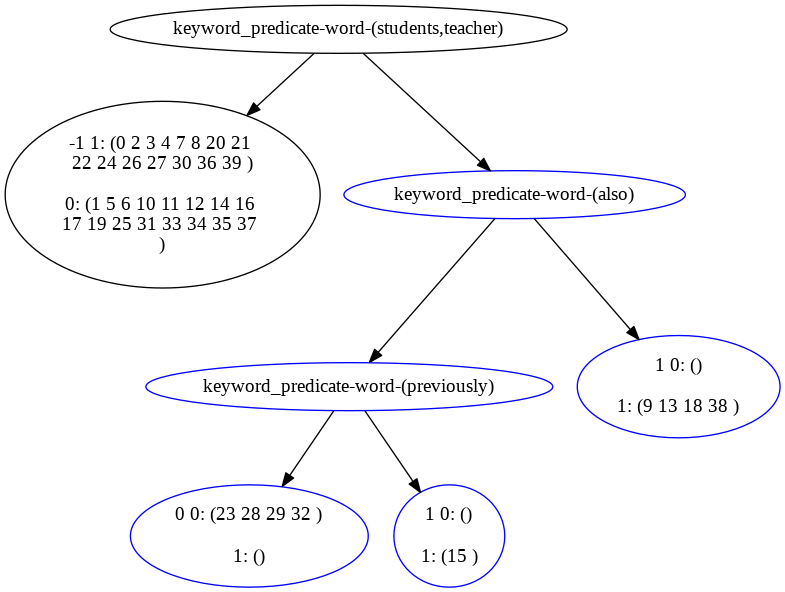



../experiment_results_folders/witan_refinements_2/_20231013063133/20231013063133_tree_information_gain_1_dot_file


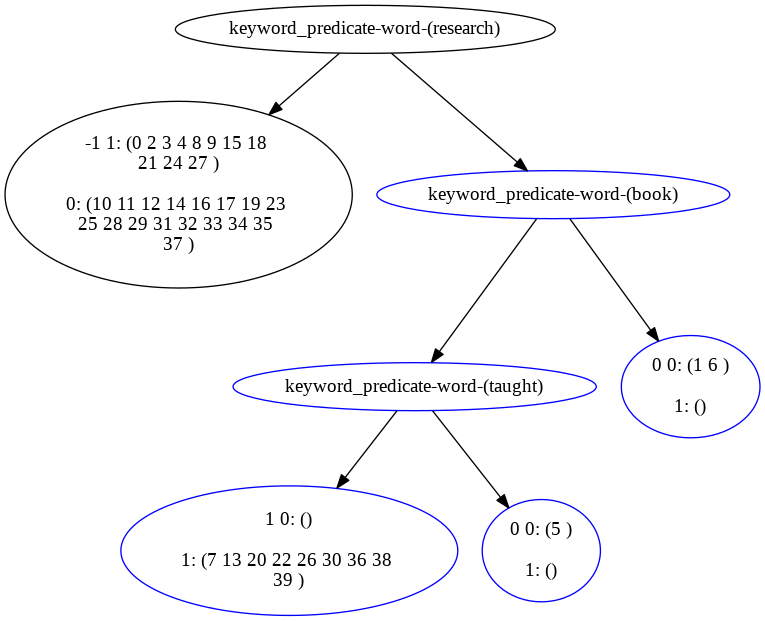



../experiment_results_folders/witan_refinements_2/_20231013063133/20231013063133_tree_information_gain_2_dot_file


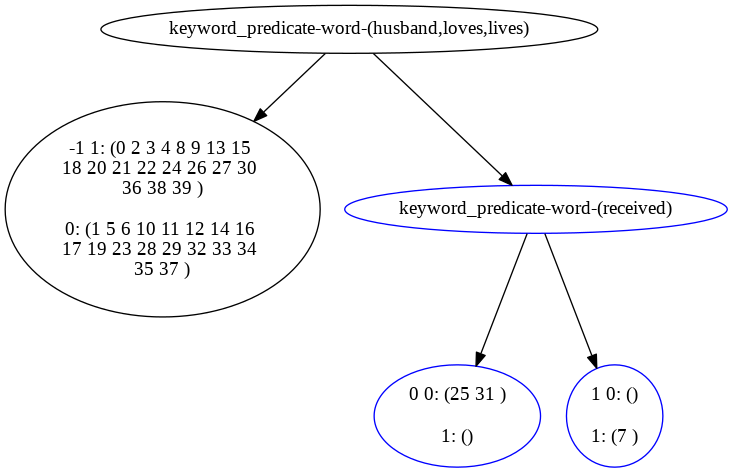



../experiment_results_folders/witan_refinements_2/_20231013063133/20231013063133_tree_information_gain_3_dot_file


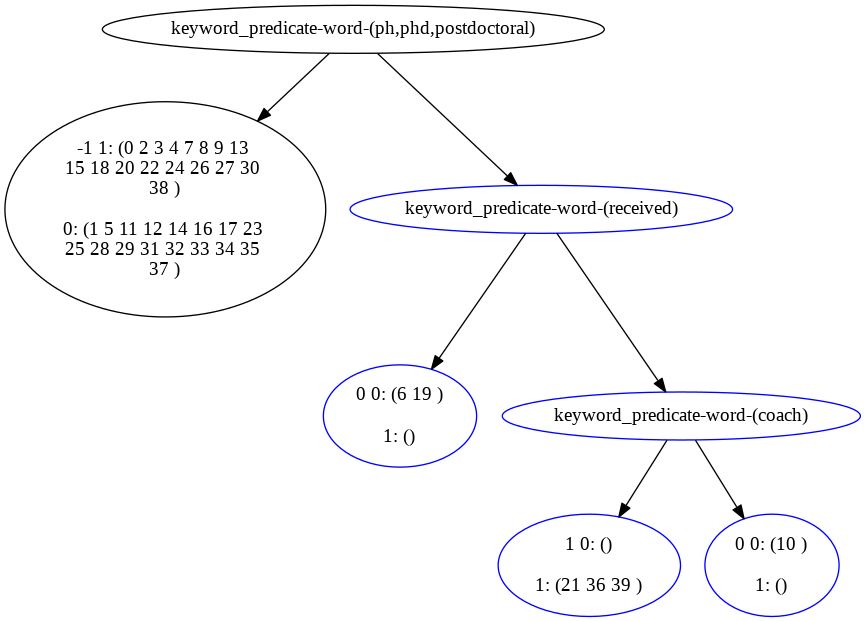



../experiment_results_folders/witan_refinements_2/_20231013063133/20231013063133_tree_information_gain_4_dot_file


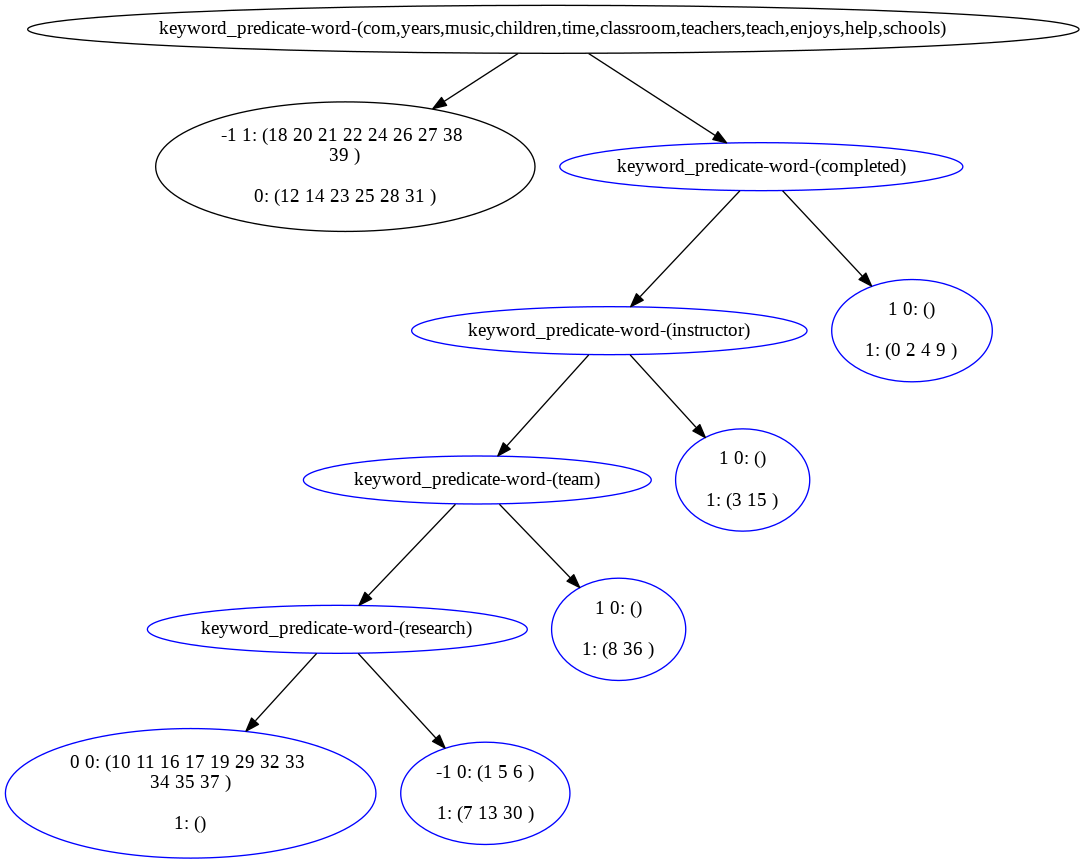



../experiment_results_folders/witan_refinements_2/_20231013063133/20231013063133_tree_information_gain_5_dot_file


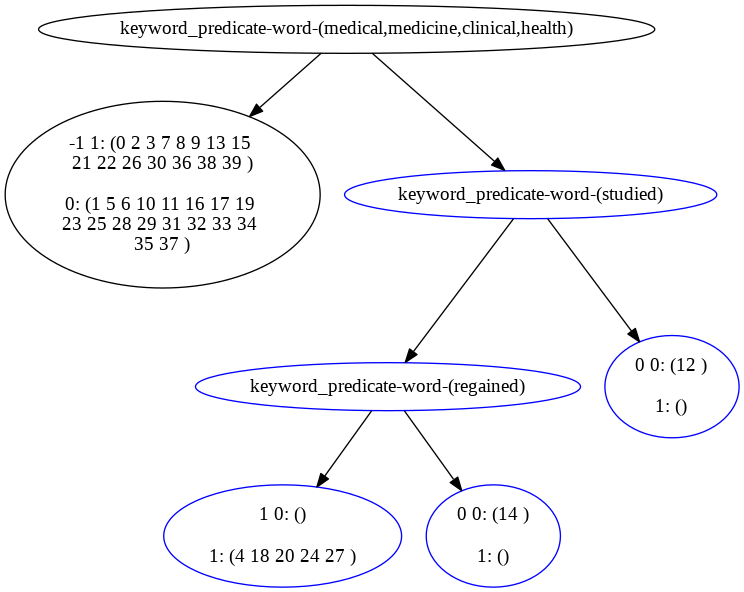



../experiment_results_folders/witan_refinements_2/_20231013063133/20231013063133_tree_information_gain_6_dot_file


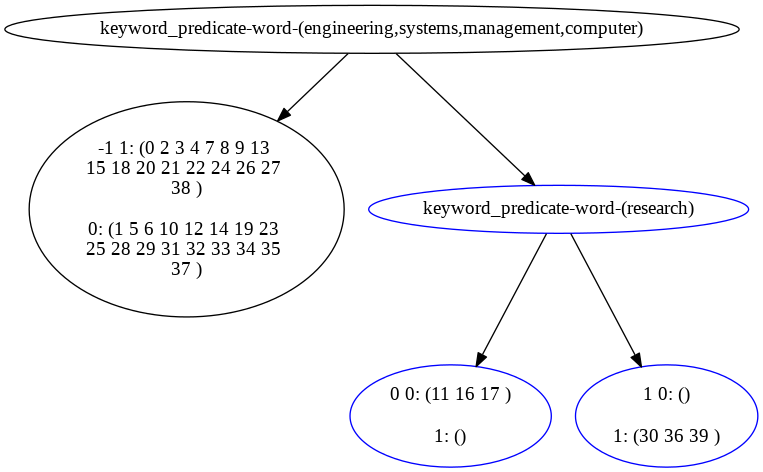

In [109]:
show_trees('../experiment_results_folders/witan_refinements_2/_20231013063133/')

## amazon positive ham, negative spam

In [110]:
amazon_inputs = show_user_inputs('../experiment_results_folders/witan_refinements_2/_20231013063219/')

['old_text', 'expected_label', 'fold', 'cid', 'text', 'model_pred', 'vectors', 'id']


In [111]:
amazon_inputs

,text,expected_label,model_pred,id,cid,vectors
9,in just fits everything the in fits everything and has worked well for my son it was a present for him he loves it i would endorse it trust me if my son likes it its great,0,1,9,103417,"-1,-1,0,-1,-1,-1,1,-1,0,-1,-1,1,-1,-1,1"
29,pound gentle dog destroyed this is minutes of pretty tame play lasted minutes this is made out of a cheap material and my pound shih tzu destroyed it in minutes and she is usually pretty gentle with her toys the top and bottom halves screw together and easily just pull apart i would not recommend this it may become unsafe if plastic parts are broken off and ingested,1,1,29,156386,"-1,1,-1,-1,-1,0,1,-1,-1,-1,-1,-1,-1,-1,1"
38,a total and utter sham and fabrication antichristian this new age frauds series of books are full of lies and fabrications claiming to be the voice of god this book claims that god suggests that value less moral relativism no good or evilis the path to a new world order which denies the truth of love and christianity and the absolute power of god these books vols are the most damaging attempt by an anti christian to undermine the truth of jesus christ dont believe a word of it im writing a book called the practical guide to real christianity which will dispel the lies and fabrications of the shameful author of this pathetic attempt at deception,1,1,38,199962,"-1,-1,-1,-1,-1,-1,1,-1,0,-1,-1,-1,-1,-1,-1"
6,blows me away every time when my friends ask me why i bring up the band so often this is usually the album ill put on while big pink is at least as enjoyable and masterful the brown album is in my opinion the best introduction to the bands sound from the opening plea of across the great divide to the final electrifying solo of king harvest has surely come this might be the perfect album it has beautiful ballads the night they drove old dixie down whispering pines the unfaithful servant hard rockers jemima surrender king harvest look out cleveland up on cripple creek and everything in betweenmy favorite song on the album changes from week to weeki mean how do you choose among the spine tingling solo in unfaithful servant levons southern drawl in cripple creek and the down home feeling of rockin chair you dont you just listen to the whole album and be happy that youve discovered such a great band,0,1,6,17009,"-1,-1,0,-1,-1,-1,1,-1,0,-1,-1,-1,-1,-1,-1"
33,can a real mafia romance please stand up this story was rushed and was flat ronan goes from being a mafia son to being a manwhore to being a one woman man all with in a few pages a couple of scenes are told over in each characters pov or what i guess is suppose to be the character pov there were some pretty basic editing mistakes words missing letters kara sees her ex boyfriend get shot and killed so she runs to her stepbrother but their parents are divorced ronan and his family are in the mafia what gets me really just makes this story fall completely flat for meis the fact you cant leave the mafia so easily the completely change in ronan from strong son of a mafia don to a man who wants to run away with the girl he is screwing,1,1,33,142959,"-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1"
13,do you want to be relentless the writer states in ecclesiastes that finishing is better than starting this is an ironic verse to begin a book on persevering through trials because while they are better to finish than start relentless by john bevere got better and better as i read it to the point that finishing it was better than starting it the title is also ironic as bevere is relentless in driving home a message of doing everything possible for the kingdom and not giving up relentless is full of scripture references with pages and at least one per page on average it is safe to say that this book is based on bible no debate but it also contains personal anecdotes life application examples and is all done through the heart of a man who cares about people i am hard pressed to find anything i didnt l

../experiment_results_folders/witan_refinements_2/_20231013063219/
../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_0_dot_file


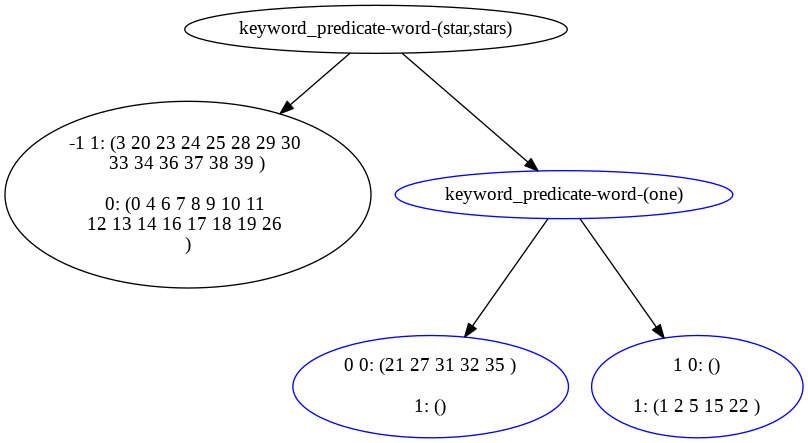



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_1_dot_file


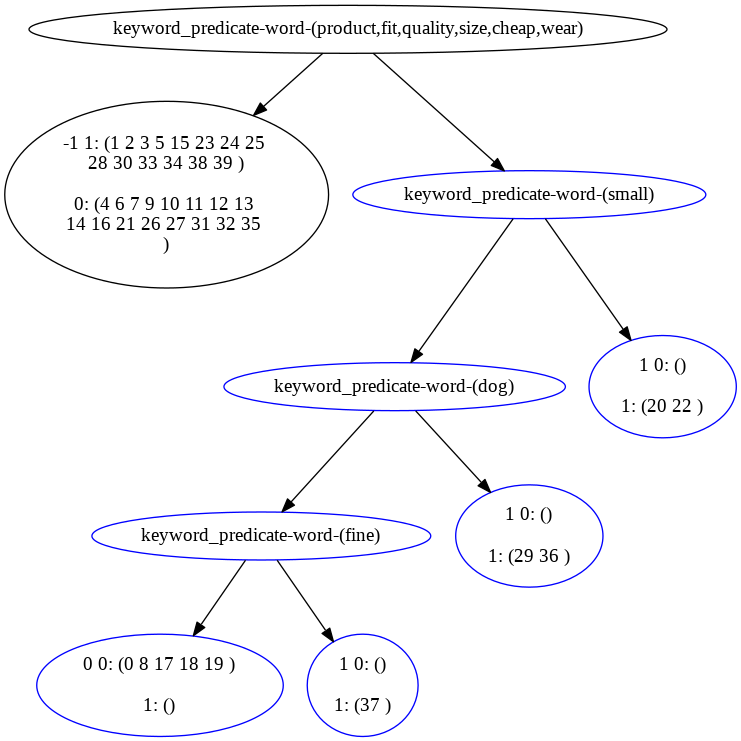



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_10_dot_file


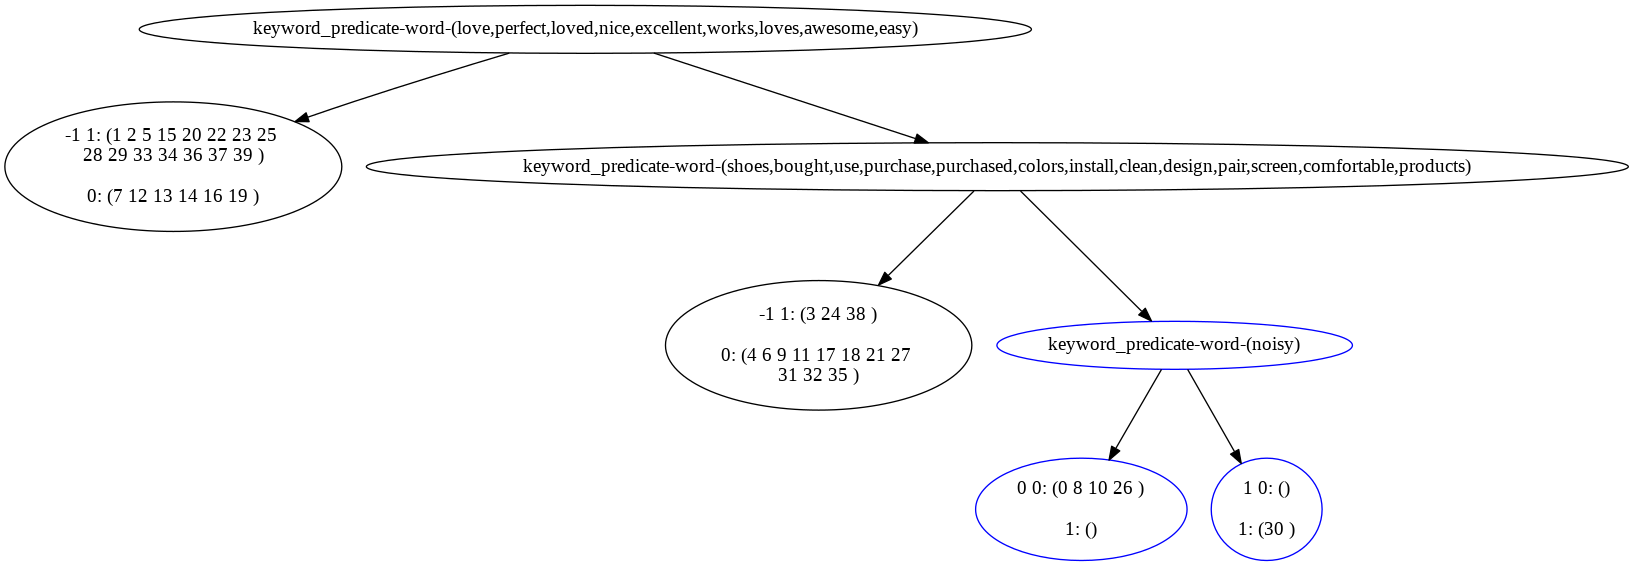



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_11_dot_file


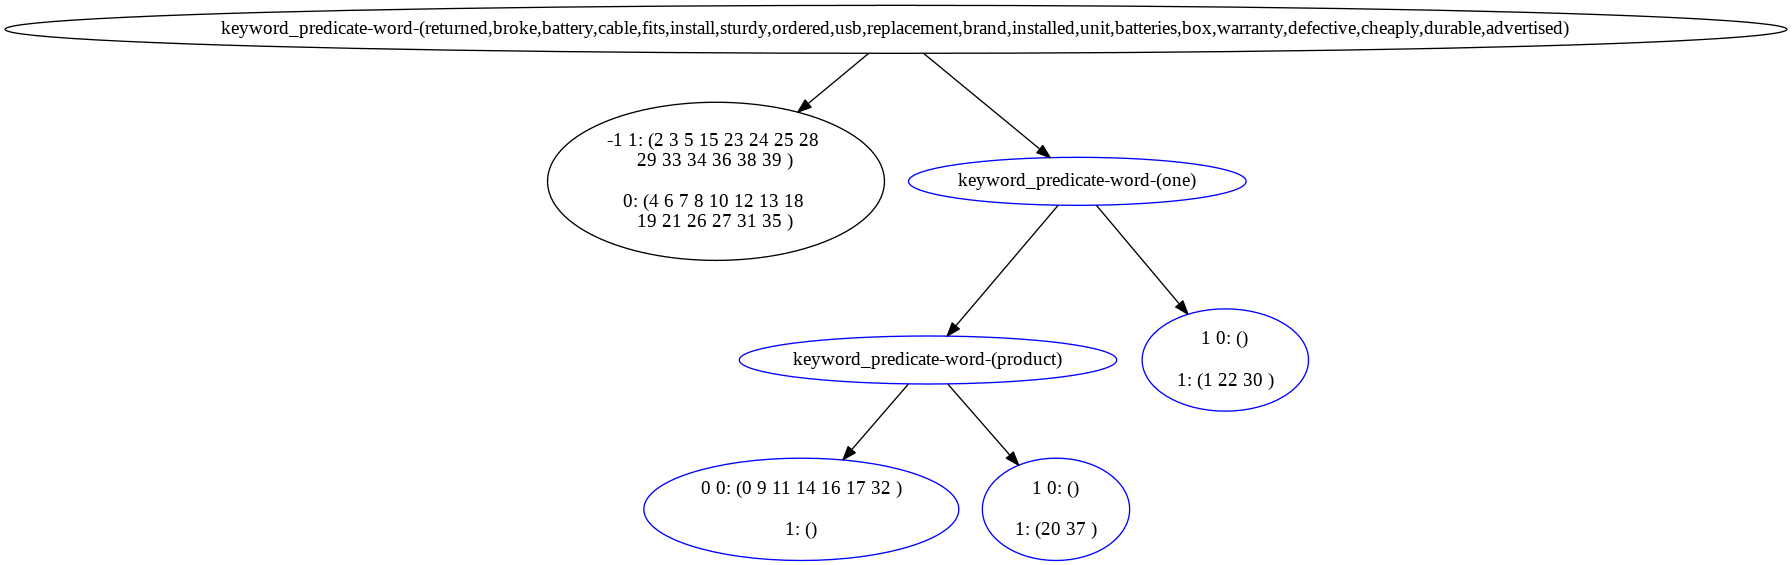



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_12_dot_file


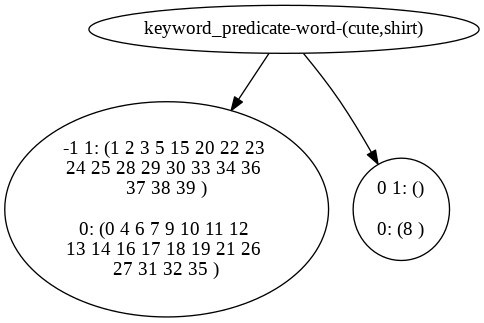



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_13_dot_file


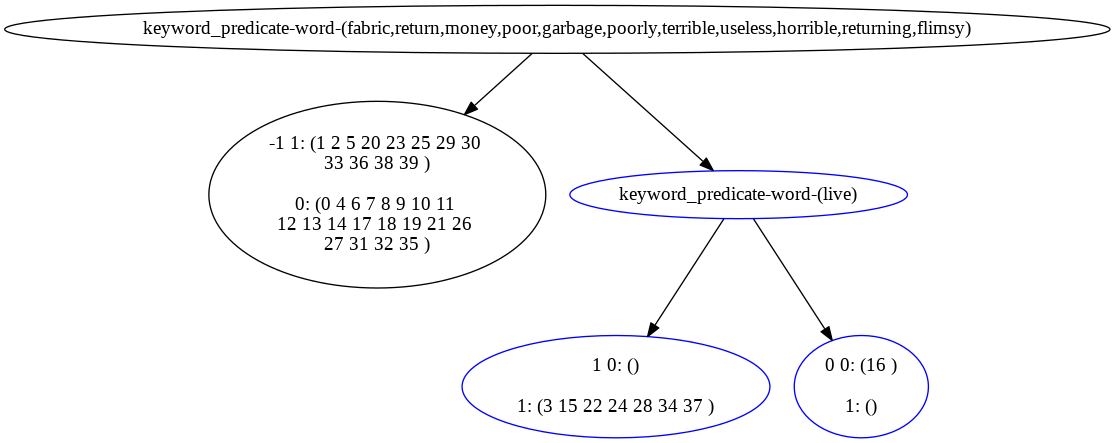



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_14_dot_file


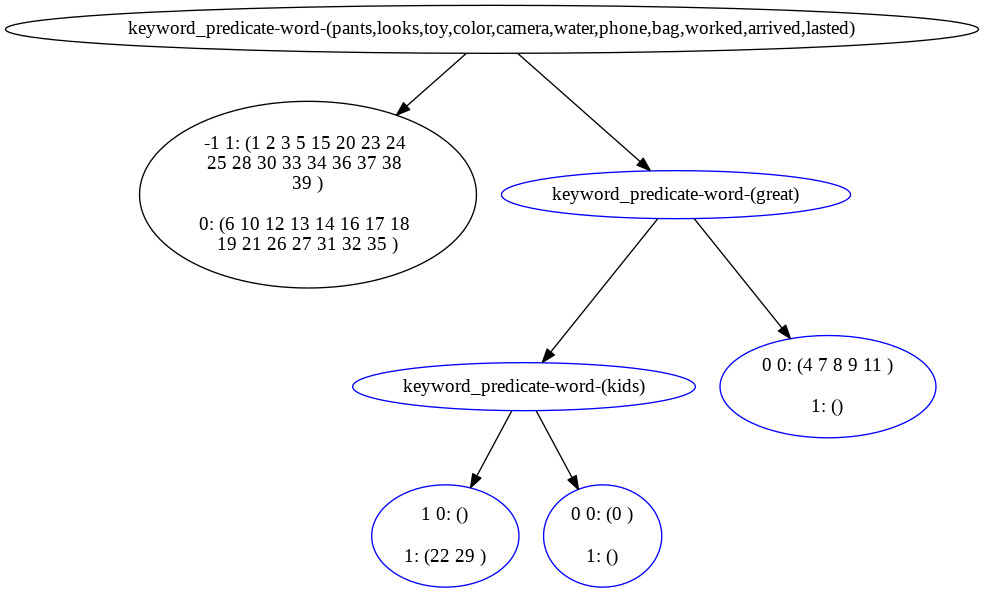



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_2_dot_file


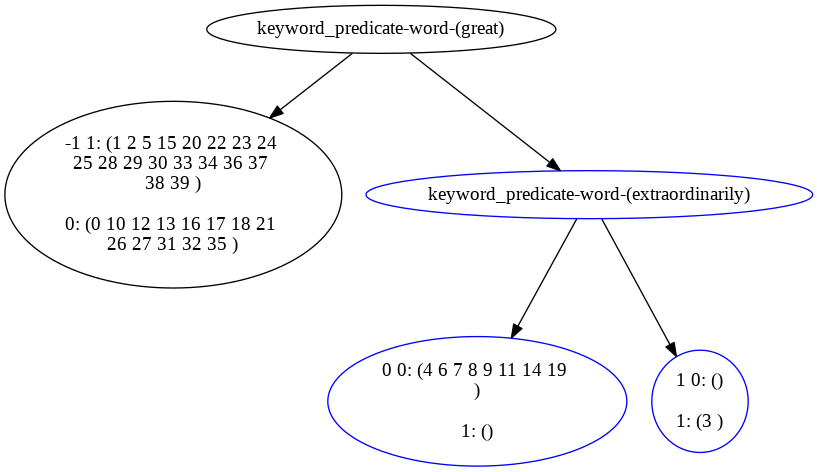



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_3_dot_file


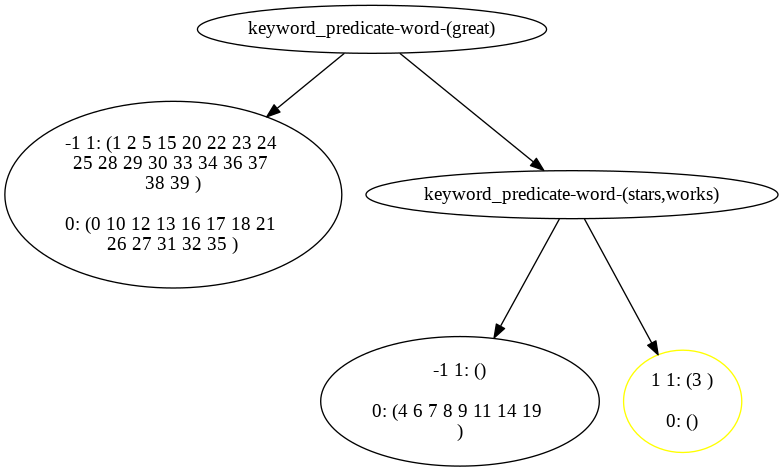



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_4_dot_file


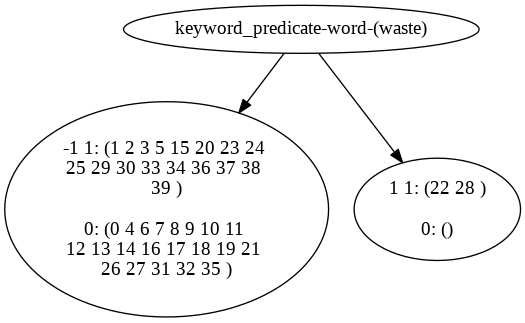



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_5_dot_file


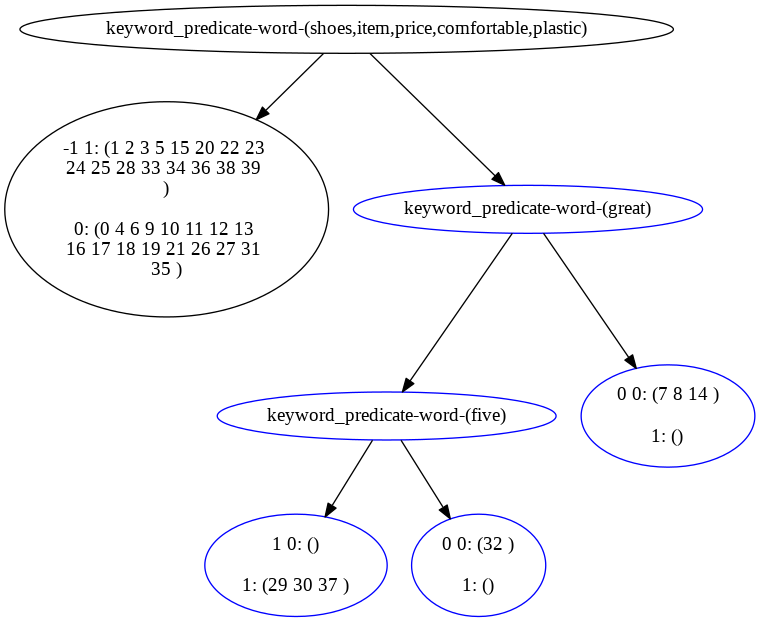



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_6_dot_file


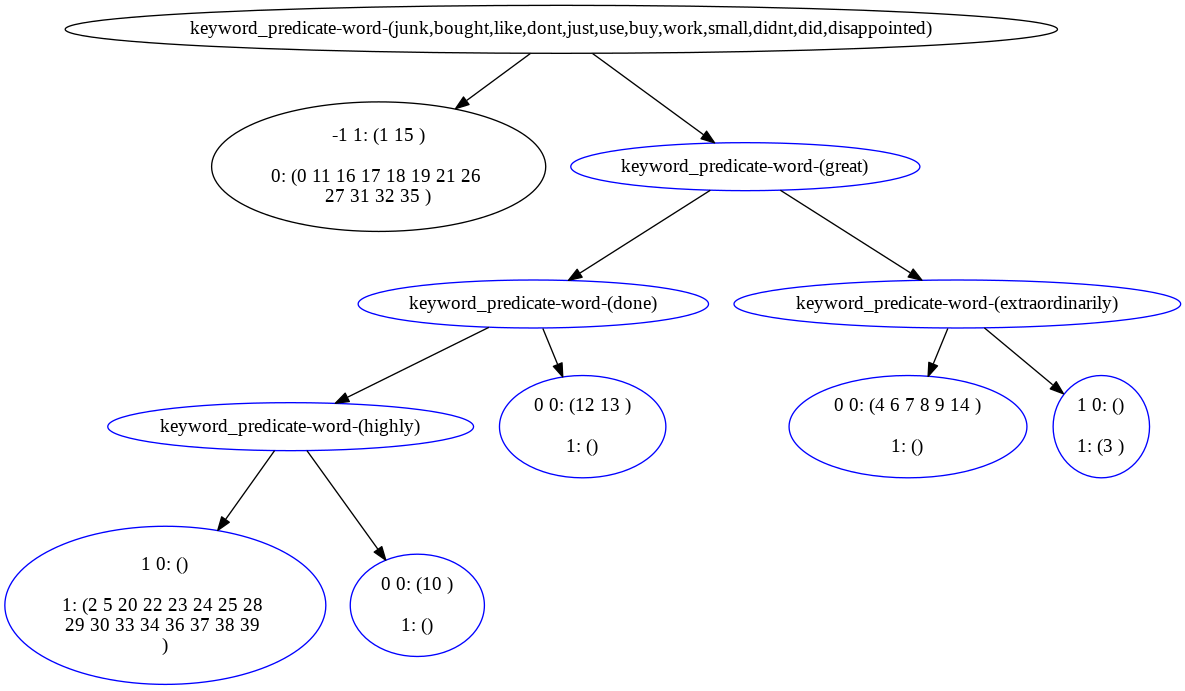



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_7_dot_file


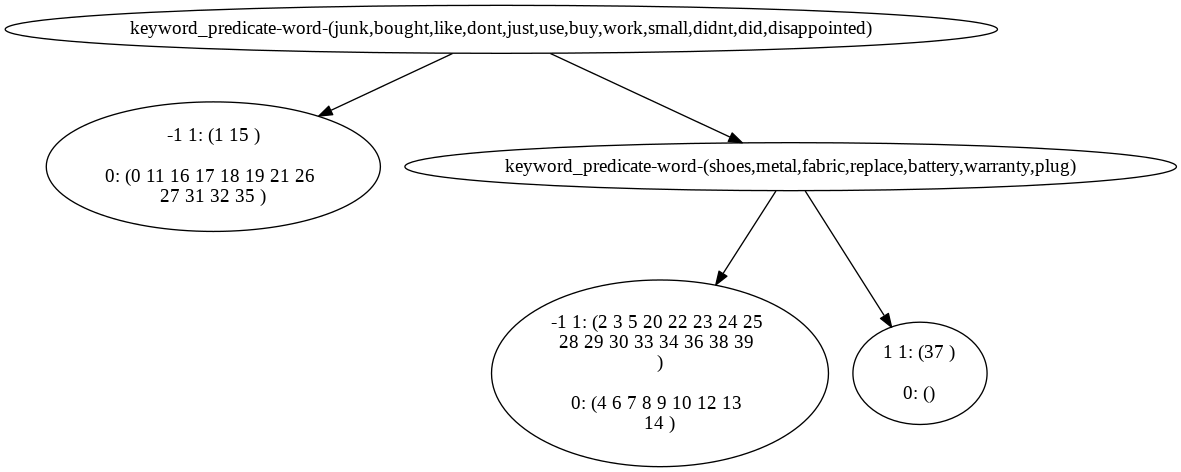



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_8_dot_file


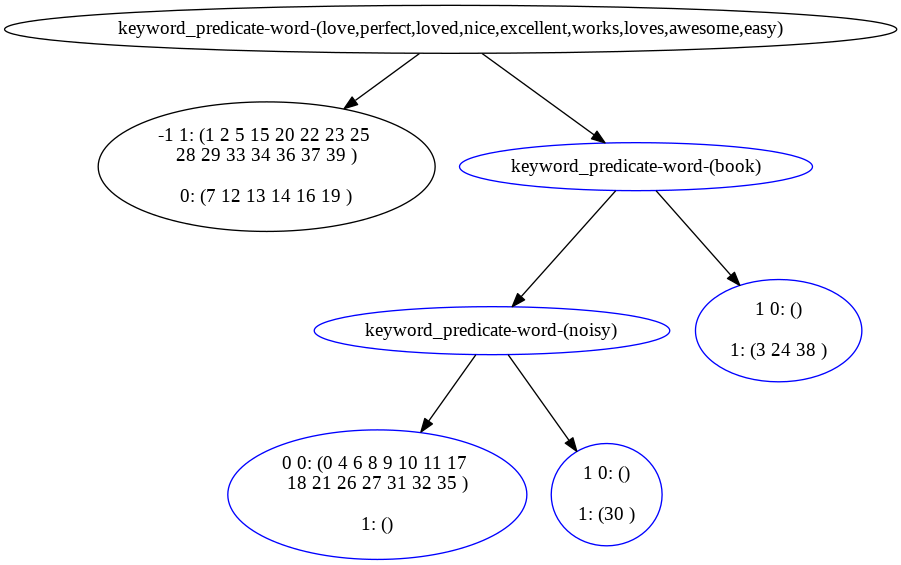



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_9_dot_file


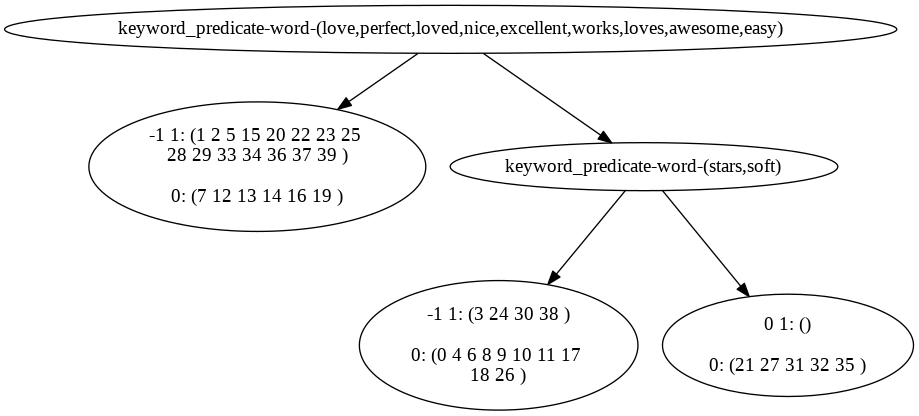



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_10_dot_file


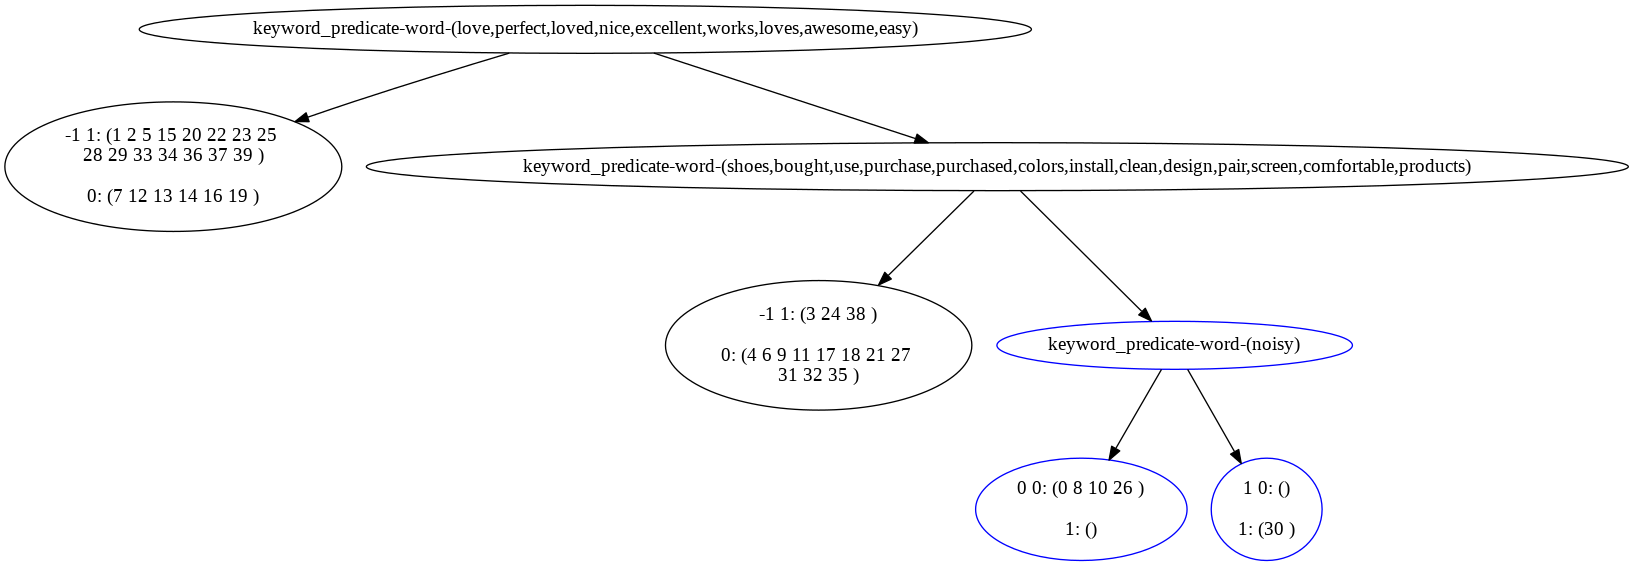



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_11_dot_file


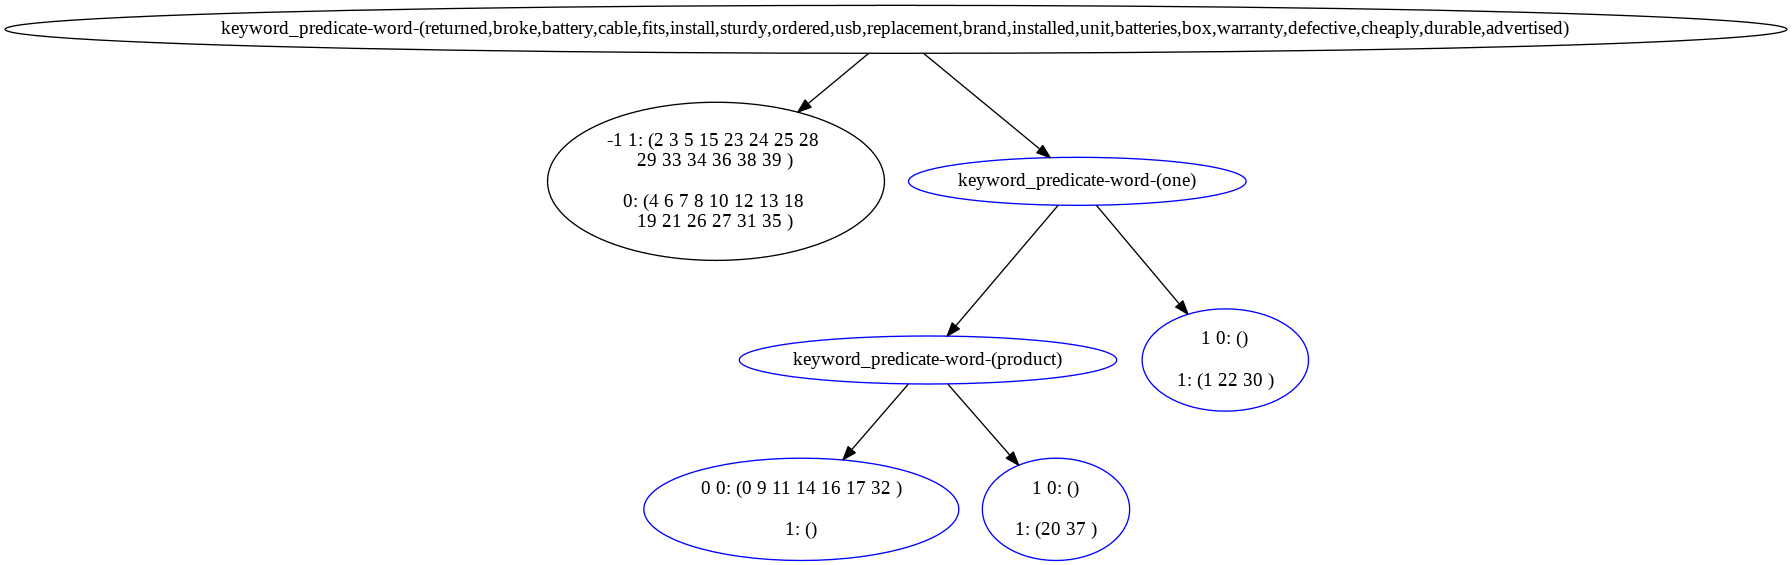



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_12_dot_file


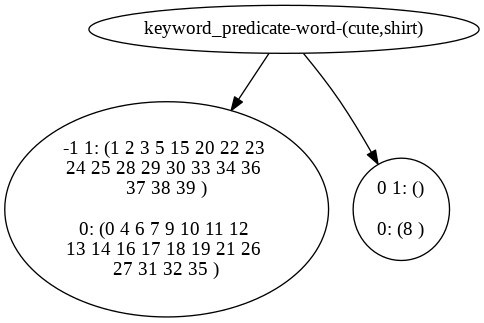



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_13_dot_file


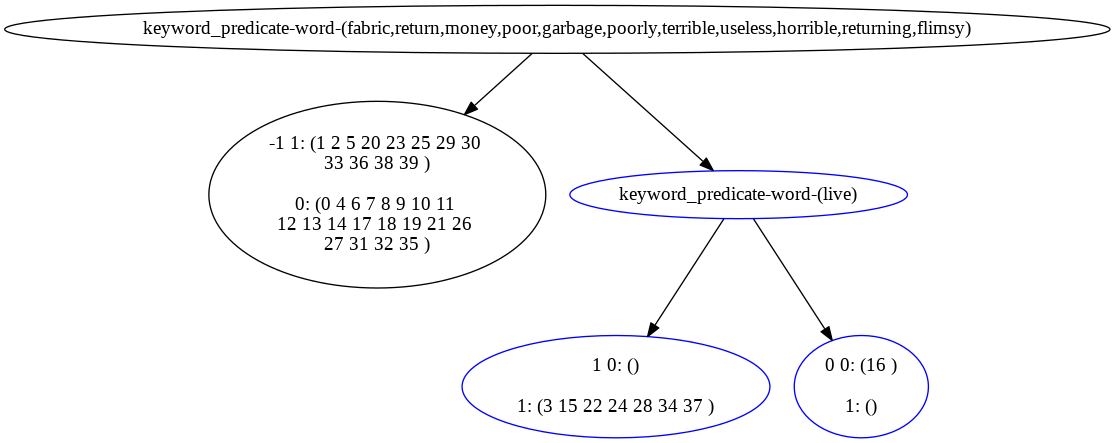



../experiment_results_folders/witan_refinements_2/_20231013063219/20231013063219_tree_information_gain_14_dot_file


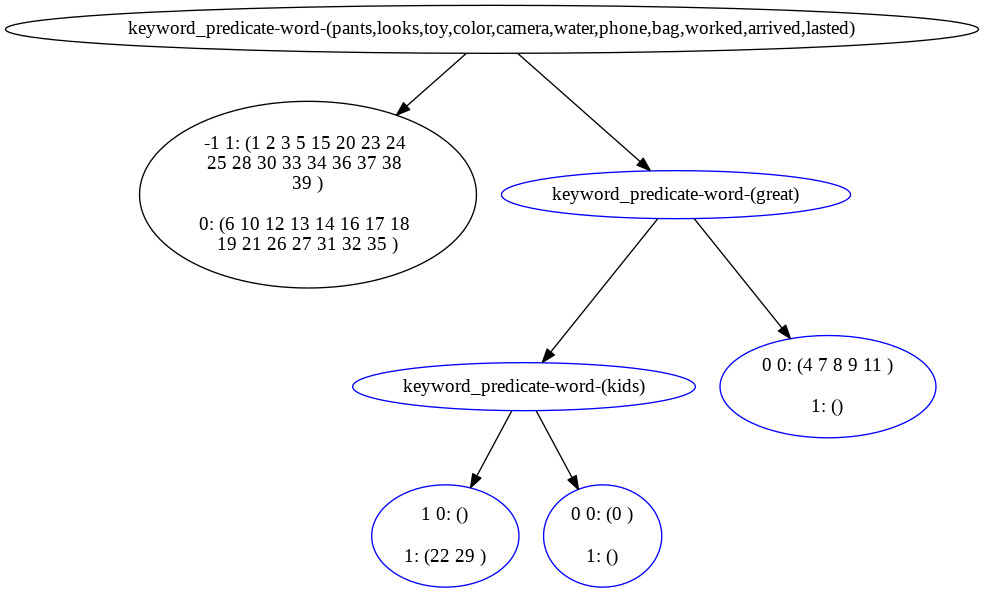

In [112]:
show_trees('../experiment_results_folders/witan_refinements_2/_20231013063219/')

In [113]:
show_stats('../experiment_results_folders/witan_refinements_2/_20231013063219/')

,strat,seed,table_name,rbbm_runtime,bbox_runtime,avg_tree_size_increase,user_input_size,complaint_ratio,num_complaints,num_confirmations,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt,num_functions,deletion_factor,post_fix_num_funcs,num_of_funcs_processed_by_algo,complaint_reached_max,confirm_reached_max,lf_source,retrain_after_percent,retrain_accuracy_thresh,load_funcs_from_pickle,pre_deletion_threshold
0,information_gain,123,amazon,2.474,916.581,2.666667,40,0.5,20,20,0.643,0.95,1.0,0.783,184548,184548,15,0.0,15,15,False,False,undefined,1,1,False,0.0


In [114]:
df = show_stats_combined('../experiment_results_folders/witan_refinements_3/')

In [115]:
df

,strat,seed,table_name,rbbm_runtime,bbox_runtime,avg_tree_size_increase,user_input_size,complaint_ratio,num_complaints,num_confirmations,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt,num_functions,deletion_factor,post_fix_num_funcs,num_of_funcs_processed_by_algo,complaint_reached_max,confirm_reached_max,lf_source,retrain_after_percent,retrain_accuracy_thresh,load_funcs_from_pickle,pre_deletion_threshold
0,information_gain,999,painter_architect,2.022,22.196,3.200000,40,0.5,20,20,0.931,0.550,1.0,0.913,10877,10877,10,0.0,10,10,False,False,undefined,1,1,False,0.0
0,information_gain,999,professor_teacher,1.121,32.231,5.428571,40,0.5,20,20,0.883,0.150,1.0,0.870,19627,19627,7,0.0,7,7,False,False,undefined,1,1,False,0.0
0,information_gain,999,amazon,3.125,943.607,2.266667,40,0.5,20,20,0.643,0.950,1.0,0.789,184548,184548,15,0.0,15,15,False,False,undefined,1,1,False,0.0
0,information_gain,999,painter_architect,5.096,23.778,6.000000,80,0.5,40,40,0.931,0.675,1.0,0.904,10877,10877,10,0.0,10,10,False,False,undefined,1,1,False,0.0
0,information_gain,999,professor_teacher,2.345,30.752,5.428571,80,0.5,40,40,0.883,0.500,1.0,0.892,19627,16093,7,0.0,7,7,False,False,undefined,1,1,False,0.0
0,information_gain,999,amazon,11.379,1030.244,4.800000,80,0.5,40,40,0.643,0.925,1.0,0.809,184548,184548,15,0.0,15,15,False,False,undefined,1,1,False,0.0


In [116]:
df_painter = pd.read_csv('../experiment_results_folders/witan_refinements_3/_20231013160948/sampled_user_input_20231013160948_information_gain_40.csv')

In [117]:
df_painter

,old_text,expected_label,fold,cid,text,model_pred,vectors,id
0,_ previous work in Eastern James Bay Cree Territory informs _ current research on indigenous place-making within Canadian urban centres. _ is pursuing this research with Brook McIlroy Architects & Planners.,1,1,3195,previous work in eastern james bay cree territory informs current research on indigenous place making within canadian urban centres is pursuing this research with brook mcilroy architects planners,0,"-1,-1,-1,-1,-1,-1,-1,-1,-1,0",0
1,"_ films the process of creating _ pieces of art and uploads the videos to this application, where the amount of subscribers has crossed half a million. Drawing has always been _’s main passion. With the help of _ works, _ tries to inspire other people to find an activity that their soul strives for.",0,1,10569,films the process of creating pieces of art and uploads the videos to this application where the amount of subscribers has crossed half a million drawing has always been s main passion with the help of works tries to inspire other people to find an activity that their soul strives for,1,"-1,-1,0,-1,-1,1,-1,-1,-1,-1",1
2,"_ has gained over 20 years of experience under _ belt working as a nature illustrations to wildlife art, from painted stones to trompe l’oeil. _ animal rocks are meticulously painted with so much detail that they seem so real. The owl seems to peeking from the tree hollow and the handsome cat looks great sitting on the chair.",0,0,6311,has gained over years of experience under belt working as a nature illustrations to wildlife art from painted stones to trompe loeil animal rocks are meticulously painted with so much detail that they seem so real the owl seems to peeking from the tree hollow and the handsome cat looks great sitting on the chair,1,"-1,-1,0,-1,1,-1,-1,-1,-1,-1",2
3,"Louis, Mo., and a recognized expert in the design of learning spaces for children with sensory and cognitive needs. _ participated in the design of a new school for Central Institute for the Deaf in St. Louis in 2000 and a new campus for Sunshine Cottage School for the Deaf in San Antonio, Texas. Contact _ at marcus_a@mackeymitchell.com.×",1,0,1245,louis mo and a recognized expert in the design of learning spaces for children with sensory and cognitive needs participated in the design of a new school for central institute for the deaf in st louis in and a new campus for sunshine cottage school for the deaf in san antonio texas contact at marcus a mackeymitchell com,0,"-1,-1,-1,-1,-1,-1,-1,-1,-1,0",3
4,"_ views culture as an organic form that changes through the acquisition of new ideas and new imagery, much like immigrants accumulating material possessions. During the Bemis residency, _ plans to explore, from varied vantage points, the relationship of language and labels to race and identity, weaving _ own experience into the conversation within that context.",0,0,7040,views culture as an organic form that changes through the acquisition of new ideas and new imagery much like immigrants accumulating material possessions during the bemis residency plans to explore from varied vantage points the relationship of language and labels to race and identity weaving own experience into the conversation within that context,1,"-1,-1,-1,-1,1,-1,-1,-1,-1,-1",4
5,"Ferguson is headquartered in Newport News, Virginia, and is classified in the wholesale supply industry – perhaps best known for plumbing products but also catering to a variety of businesses in multiple industries. Here is how _ describes _ background and current work:",1,0,1995,ferguson is headquartered in newport news virginia and is classified in the wholesale supply industry perhaps best known for plumbing products but also catering to a variety of businesses in multiple industries here is how describes background and current work,0,"-1,-1,-1,-1,-1,-1,-1,-1,-1,0",5
6,"_ practice is predominantly studio based but _ has always taken on specific projects to site _ practice in 

In [118]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D


# Define marker shapes based on user_input_size
markers = {40: 'o', 80: 's'}

# Create the scatter plot with different colors and marker shapes
for y_value, color in zip(y_values, colors):
    for _, row in df.iterrows():
        user_input_size = row['user_input_size']
        marker = markers.get(user_input_size, 'o')
        ax.scatter(row['table_name'], row[y_value], color=color, marker=marker, s=100, edgecolors='black')

# Set labels and title
plt.xlabel('Table Name')
plt.ylabel('Y Values')
plt.title('Scatter Plot with Custom Colors and Marker Shapes')

# Define custom legend handles for the first legend
legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=y_value) for y_value, color in zip(y_values, colors)]

# Create the first legend for colors based on y-values
color_legend = ax.legend(handles=legend_handles, labels=y_values, loc='upper right', title='Y Values')

# Create the second legend for marker shapes based on user_input_size
marker_handles = [Line2D([0], [0], marker=marker, color='w', markerfacecolor='black', markersize=10, label=f'User Input Size: {size}') for size, marker in markers.items()]
marker_legend = ax.legend(handles=marker_handles, loc='lower right', title='Marker Shapes')

# Add the second legend to the first
ax.add_artist(color_legend)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

plt.show()




NameError: name 'y_values' is not defined